![NLP](download.png)

<a name="back"></a>
# Table of contents
1. [Application of NLP](#application)
    1. [Tokenization](#subparagraph1)
    1. [Stemming](#subparagraph2)
    1. [Lemmatization](#subparagraph3)
    1. [Stopwords](#subparagraph4)
    1. [Part Of Speech tags](#subparagraph5)
    1. [The named entity recognition](#subparagraph6)
    1. [Syntax Tree](#subparagraph7)
2. [Building ML on the movie reviews](#paragraph1)
    1. [Extraction and processing of data](#subparagraph21)
    1. [Creating targets](#subparagraph22)
    1. [Creating features](#subparagraph23)
    1. [Spliting Training Dand Testing Data](#subparagraph24)
3. [Measuring the Performance of a MultinomialNB Machine Learning Model](#paragraph2)
    1. [Model Evaluation using Confusion Matrix](#subparagraph31)
    1. [Visualizing Confusion Matrix using Heatmap](#subparagraph32)
    1. [Confusion Matrix Evaluation Metrics](#subparagraph33)
    1. [ROC Curve (Plotting an ROC curve)](#subparagraph34)
    1. [AUC](#subparagraph35)
4. [Measuring the Performance of a GaussianNB Machine Learning Model](#paragraph3)
    1. [Model Evaluation using Confusion Matrix](#subparagraph41)
    1. [Visualizing Confusion Matrix using Heatmap](#subparagraph42)
    1. [Confusion Matrix Evaluation Metrics](#subparagraph43)
    1. [ROC Curve (Plotting an ROC curve)](#subparagraph44)
    1. [AUC](#subparagraph45)

# 1. Application of NLP <a name="application"></a>

## A. Tokenization <a name="subparagraph1"></a>

### Importing necessary libraries

In [1]:
import os
import nltk
import nltk.corpus

### Previous files

In [2]:
print(os.listdir(nltk.data.find("corpora")))

['brown', 'brown.zip', 'gutenberg', 'gutenberg.zip', 'movie_reviews', 'movie_reviews.zip', 'product_reviews_1', 'product_reviews_1.zip', 'product_reviews_2', 'product_reviews_2.zip', 'stopwords', 'stopwords.zip', 'webtext', 'webtext.zip', 'wordnet', 'wordnet.zip', 'words', 'words.zip']


### If you don't have the Gutenberg file, use this command to download it 

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

### Viewing the Gutenberg files

In [4]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### The elements of the Alice

In [5]:
alice = nltk.corpus.gutenberg.words( 'carroll-alice.txt')
alice


['[', 'Alice', "'", 's', 'Adventures', 'in', ...]

### The first 1000 elements

In [6]:
for word in alice[:1000]:
    print(word, sep = " ", end = " ")

[ Alice ' s Adventures in Wonderland by Lewis Carroll 1865 ] CHAPTER I . Down the Rabbit - Hole Alice was beginning to get very tired of sitting by her sister on the bank , and of having nothing to do : once or twice she had peeped into the book her sister was reading , but it had no pictures or conversations in it , ' and what is the use of a book ,' thought Alice ' without pictures or conversation ?' So she was considering in her own mind ( as well as she could , for the hot day made her feel very sleepy and stupid ), whether the pleasure of making a daisy - chain would be worth the trouble of getting up and picking the daisies , when suddenly a White Rabbit with pink eyes ran close by her . There was nothing so VERY remarkable in that ; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself , ' Oh dear ! Oh dear ! I shall be late !' ( when she thought it over afterwards , it occurred to her that she ought to have wondered at this , but at the time it all

### A paragraph about artificial intelligence from Wikipedia

In [7]:
AI = """Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans. Leading AI textbooks define the field as the study of "intelligent agents": any system that perceives its environment and takes actions that maximize its chance of achieving its goals. 
Some popular accounts use the term "artificial intelligence" to describe machines that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem solving", however, this definition is rejected by major AI researchers. AI applications include advanced web search engines (e.g., Google), recommendation systems (used by YouTube, Amazon and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g., Tesla), automated decision-making and competing at the highest level in strategic game systems (such as chess and Go). citation needed] As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect. For instance, optical character recognition is frequently excluded from things considered to be AI, having become a routine technology.
Artificial intelligence was founded as an academic discipline in 1956, and in the years since has experienced several waves of optimism, followed by disappointment and the loss of funding (known as an "AI winter"), followed by new approaches, success and renewed funding. AI research has tried and discarded many different approaches since its founding, including simulating the brain, modeling human problem solving, formal logic, large databases of knowledge and imitating animal behavior. In the first decades of the 21st century, highly mathematical statistical machine learning has dominated the field, and this technique has proved highly successful, helping to solve many challenging problems throughout industry and academia. 
The various sub-fields of AI research are centered around particular goals and the use of particular tools. The traditional goals of AI research include reasoning, knowledge representation, planning, learning, natural language processing, perception, and the ability to move and manipulate objects. General intelligence (the ability to solve an arbitrary problem) is among the field\'s long-term goals.To solve these problems, AI researchers have adapted and integrated a wide range of problem-solving techniques—including search and mathematical optimization, formal logic, artificial neural networks, and methods based on statistics, probability and economics. AI also draws upon computer science, psychology, linguistics, philosophy, and many other fields. 
The field was founded on the assumption that human intelligence "can be so precisely described that a machine can be made to simulate it". This raises philosophical arguments about the mind and the ethics of creating artificial beings endowed with human-like intelligence. These issues have been explored by myth, fiction, and philosophy since antiquity. Science fiction and futurology have also suggested that, with its enormous potential and power, AI may become an existential risk to humanity.
"""

### Importing word_tokenize from nltk tokenize library

In [8]:
from nltk.tokenize import word_tokenize

### Tokenizing the AI

In [9]:
AI_tokens = word_tokenize(AI)
AI_tokens

['Artificial',
 'intelligence',
 '(',
 'AI',
 ')',
 'is',
 'intelligence',
 'demonstrated',
 'by',
 'machines',
 ',',
 'as',
 'opposed',
 'to',
 'natural',
 'intelligence',
 'displayed',
 'by',
 'animals',
 'including',
 'humans',
 '.',
 'Leading',
 'AI',
 'textbooks',
 'define',
 'the',
 'field',
 'as',
 'the',
 'study',
 'of',
 '``',
 'intelligent',
 'agents',
 "''",
 ':',
 'any',
 'system',
 'that',
 'perceives',
 'its',
 'environment',
 'and',
 'takes',
 'actions',
 'that',
 'maximize',
 'its',
 'chance',
 'of',
 'achieving',
 'its',
 'goals',
 '.',
 'Some',
 'popular',
 'accounts',
 'use',
 'the',
 'term',
 '``',
 'artificial',
 'intelligence',
 "''",
 'to',
 'describe',
 'machines',
 'that',
 'mimic',
 '``',
 'cognitive',
 "''",
 'functions',
 'that',
 'humans',
 'associate',
 'with',
 'the',
 'human',
 'mind',
 ',',
 'such',
 'as',
 '``',
 'learning',
 "''",
 'and',
 '``',
 'problem',
 'solving',
 "''",
 ',',
 'however',
 ',',
 'this',
 'definition',
 'is',
 'rejected',
 'by',
 

### The number of tokens

In [10]:
# Of course, the number is different from the video because the file is different
len(AI_tokens)

556

### Importing the distinct frequency function

In [11]:
from nltk.probability import FreqDist
fdist = FreqDist()

### Finding the word count of all the words in the paragraph

In [12]:
for word in AI_tokens :
    fdist[word.lower()]+=1
fdist

FreqDist({',': 45, 'and': 25, 'the': 23, '.': 17, 'ai': 14, 'of': 12, 'intelligence': 9, 'as': 9, 'to': 9, '(': 8, ...})

### The top 10 tokens with the highest frequency

In [13]:
fdist_top10 = fdist.most_common(10)
fdist_top10

[(',', 45),
 ('and', 25),
 ('the', 23),
 ('.', 17),
 ('ai', 14),
 ('of', 12),
 ('intelligence', 9),
 ('as', 9),
 ('to', 9),
 ('(', 8)]

### Importing bigrams, trigrams and ngrams

In [14]:
from nltk.util import bigrams, trigrams, ngrams

In [15]:
quotes = "Silence is the best answer of all stupid questions, and smile is the best reaction in all critical situations"
# Splitting the string sentence into tokens
quotes_tokens = word_tokenize(quotes)
quotes_tokens

['Silence',
 'is',
 'the',
 'best',
 'answer',
 'of',
 'all',
 'stupid',
 'questions',
 ',',
 'and',
 'smile',
 'is',
 'the',
 'best',
 'reaction',
 'in',
 'all',
 'critical',
 'situations']

### Creating the bigrams

In [16]:
quotes_bigrams = list(bigrams(quotes_tokens))
quotes_bigrams

[('Silence', 'is'),
 ('is', 'the'),
 ('the', 'best'),
 ('best', 'answer'),
 ('answer', 'of'),
 ('of', 'all'),
 ('all', 'stupid'),
 ('stupid', 'questions'),
 ('questions', ','),
 (',', 'and'),
 ('and', 'smile'),
 ('smile', 'is'),
 ('is', 'the'),
 ('the', 'best'),
 ('best', 'reaction'),
 ('reaction', 'in'),
 ('in', 'all'),
 ('all', 'critical'),
 ('critical', 'situations')]

### Creating the trigrams

In [17]:
quotes_trigrams = list(trigrams(quotes_tokens))
quotes_trigrams

[('Silence', 'is', 'the'),
 ('is', 'the', 'best'),
 ('the', 'best', 'answer'),
 ('best', 'answer', 'of'),
 ('answer', 'of', 'all'),
 ('of', 'all', 'stupid'),
 ('all', 'stupid', 'questions'),
 ('stupid', 'questions', ','),
 ('questions', ',', 'and'),
 (',', 'and', 'smile'),
 ('and', 'smile', 'is'),
 ('smile', 'is', 'the'),
 ('is', 'the', 'best'),
 ('the', 'best', 'reaction'),
 ('best', 'reaction', 'in'),
 ('reaction', 'in', 'all'),
 ('in', 'all', 'critical'),
 ('all', 'critical', 'situations')]

### Creating the ngrams

In [18]:
# here N = 4 
quotes_ngrams = list(ngrams(quotes_tokens,4 ))
quotes_ngrams

[('Silence', 'is', 'the', 'best'),
 ('is', 'the', 'best', 'answer'),
 ('the', 'best', 'answer', 'of'),
 ('best', 'answer', 'of', 'all'),
 ('answer', 'of', 'all', 'stupid'),
 ('of', 'all', 'stupid', 'questions'),
 ('all', 'stupid', 'questions', ','),
 ('stupid', 'questions', ',', 'and'),
 ('questions', ',', 'and', 'smile'),
 (',', 'and', 'smile', 'is'),
 ('and', 'smile', 'is', 'the'),
 ('smile', 'is', 'the', 'best'),
 ('is', 'the', 'best', 'reaction'),
 ('the', 'best', 'reaction', 'in'),
 ('best', 'reaction', 'in', 'all'),
 ('reaction', 'in', 'all', 'critical'),
 ('in', 'all', 'critical', 'situations')]

[Back to top](#back)

## B. Stemming <a name="subparagraph2"></a>

### Importing the porter stem

In [19]:
from nltk.stem import PorterStemmer
pst = PorterStemmer()

### The stemming of the word "going"

In [20]:
pst.stem("going")

'go'

### Another examples

In [21]:
words_to_stem = ['go', "gone", "going", "went"]
for words in words_to_stem :
    print(words+":"+pst.stem(words))

go:go
gone:gone
going:go
went:went


### Importing and using the Lancaster stemmer

In [22]:
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
# the lancaster stemer is more agressing
for words in words_to_stem :
    print(words+":"+lst.stem(words))


go:go
gone:gon
going:going
went:went


[Back to top](#back)

## C. Lemmatization <a name="subparagraph3"></a>

### If you don't have the Wordnet dictionary use this command to download it 

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Importing the Wordnet dictionary and the wordnet lemmetizer

In [24]:
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
word_lem = WordNetLemmatizer()

### The lemmetization of the word "alumni"

In [25]:
word_lem.lemmatize("alumni")

'alumnus'

### Another examples

In [26]:
#if we don't assign the pos tags it assum that all the word are nouns
for words in words_to_stem :
    print(words+":"+word_lem.lemmatize(words))

go:go
gone:gone
going:going
went:went


[Back to top](#back)

## D. Stopwords <a name="subparagraph4"></a>

### Importing the stop words

In [27]:
from nltk.corpus import stopwords

### cheking the list of stopwords

In [28]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### The total number of stopwords

In [29]:
len(stopwords.words('english'))

179

### Reviewing the top 10 tokens with the highest frequency of the AI paragraph

In [30]:
fdist_top10

[(',', 45),
 ('and', 25),
 ('the', 23),
 ('.', 17),
 ('ai', 14),
 ('of', 12),
 ('intelligence', 9),
 ('as', 9),
 ('to', 9),
 ('(', 8)]

### Importing the Re Module and creating a string that matches the punctuations

In [31]:
from string import punctuation
print ("from string.punctuation :",type(punctuation),punctuation)

from string.punctuation : <class 'str'> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [32]:
import re 
punctuation = re.compile(r'[!"#$%&\'()*+,-./:;<=>?@\^_`{|}~|0-9]')

### Removing the punctuation of the AI tokens

In [33]:
AI_tokens_no_punctuation = []
for words in AI_tokens :
    word = punctuation.sub("",words)
    if len(word) > 0 :
        AI_tokens_no_punctuation.append(word)

### Viewing AI tokens without punctuation

In [34]:
AI_tokens_no_punctuation

['Artificial',
 'intelligence',
 'AI',
 'is',
 'intelligence',
 'demonstrated',
 'by',
 'machines',
 'as',
 'opposed',
 'to',
 'natural',
 'intelligence',
 'displayed',
 'by',
 'animals',
 'including',
 'humans',
 'Leading',
 'AI',
 'textbooks',
 'define',
 'the',
 'field',
 'as',
 'the',
 'study',
 'of',
 'intelligent',
 'agents',
 'any',
 'system',
 'that',
 'perceives',
 'its',
 'environment',
 'and',
 'takes',
 'actions',
 'that',
 'maximize',
 'its',
 'chance',
 'of',
 'achieving',
 'its',
 'goals',
 'Some',
 'popular',
 'accounts',
 'use',
 'the',
 'term',
 'artificial',
 'intelligence',
 'to',
 'describe',
 'machines',
 'that',
 'mimic',
 'cognitive',
 'functions',
 'that',
 'humans',
 'associate',
 'with',
 'the',
 'human',
 'mind',
 'such',
 'as',
 'learning',
 'and',
 'problem',
 'solving',
 'however',
 'this',
 'definition',
 'is',
 'rejected',
 'by',
 'major',
 'AI',
 'researchers',
 'AI',
 'applications',
 'include',
 'advanced',
 'web',
 'search',
 'engines',
 'eg',
 'Goo

### The number of tokens now

In [35]:
len(AI_tokens_no_punctuation)

460

### Removing the stopwords of the AI tokens

In [36]:
 stop_words = set(stopwords.words("english"))

In [37]:
AI_tokens_no_punctuation_no_stopword = [ word  for word in AI_tokens_no_punctuation if word not in stop_words]

In [38]:
AI_tokens_no_punctuation_no_stopword

['Artificial',
 'intelligence',
 'AI',
 'intelligence',
 'demonstrated',
 'machines',
 'opposed',
 'natural',
 'intelligence',
 'displayed',
 'animals',
 'including',
 'humans',
 'Leading',
 'AI',
 'textbooks',
 'define',
 'field',
 'study',
 'intelligent',
 'agents',
 'system',
 'perceives',
 'environment',
 'takes',
 'actions',
 'maximize',
 'chance',
 'achieving',
 'goals',
 'Some',
 'popular',
 'accounts',
 'use',
 'term',
 'artificial',
 'intelligence',
 'describe',
 'machines',
 'mimic',
 'cognitive',
 'functions',
 'humans',
 'associate',
 'human',
 'mind',
 'learning',
 'problem',
 'solving',
 'however',
 'definition',
 'rejected',
 'major',
 'AI',
 'researchers',
 'AI',
 'applications',
 'include',
 'advanced',
 'web',
 'search',
 'engines',
 'eg',
 'Google',
 'recommendation',
 'systems',
 'used',
 'YouTube',
 'Amazon',
 'Netflix',
 'understanding',
 'human',
 'speech',
 'Siri',
 'Alexa',
 'selfdriving',
 'cars',
 'eg',
 'Tesla',
 'automated',
 'decisionmaking',
 'competing',

### The number of tokens now

In [39]:
len(AI_tokens_no_punctuation_no_stopword)

314

[Back to top](#back)

## E. Part Of Speech tags <a name="subparagraph5"></a>

### Tokenizing the example Sent

In [40]:
sentence = "Elena is a natural when it comes to swiming"
sentence_tokens = word_tokenize(sentence)

### If you don't have the Averaged_perceptron_tagger module use this command to download it 

In [41]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Using the pos tag on the example

In [42]:
for tokens in sentence_tokens :
    print(nltk.pos_tag([tokens]))

[('Elena', 'NN')]
[('is', 'VBZ')]
[('a', 'DT')]
[('natural', 'JJ')]
[('when', 'WRB')]
[('it', 'PRP')]
[('comes', 'VBZ')]
[('to', 'TO')]
[('swiming', 'VBG')]


### Using it on another example

In [43]:
sentence2 = 'Michael is watching an hularious movie'
sentence2_tokens = word_tokenize(sentence2)
for tokens in sentence2_tokens :
    print(nltk.pos_tag([tokens]))

[('Michael', 'NNP')]
[('is', 'VBZ')]
[('watching', 'VBG')]
[('an', 'DT')]
[('hularious', 'JJ')]
[('movie', 'NN')]


[Back to top](#back)

## F. The named entity recognition <a name="subparagraph6"></a>

### If you don't have the Maxent_ne_chunker module use this command to download it 

In [44]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

### If you don't have the Words module use this command to download it 

In [45]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### Importing the ne_chunk

In [46]:
from nltk import ne_chunk

### The example

In [47]:
NE_sentence = 'The US President stays in the WHITE HOUSE'

### Tokenizing and adding the pos tags on this example

In [48]:
NE_tokens = word_tokenize(NE_sentence)
NE_tags = nltk.pos_tag(NE_tokens)

### Using the ne_chunk

In [49]:
NE_Chunked = ne_chunk(NE_tags)
print(NE_Chunked)

(S
  The/DT
  (ORGANIZATION US/NNP)
  President/NNP
  stays/VBZ
  in/IN
  the/DT
  (FACILITY WHITE/NNP HOUSE/NNP))


[Back to top](#back)

## G. Syntax Tree <a name="subparagraph7"></a>

### Tokenizing and adding the pos tags on this example

In [50]:
new = "The big cat ate the little mouse  who was after fresh cheese"
new_tokens = nltk.pos_tag(word_tokenize(new))
new_tokens


[('The', 'DT'),
 ('big', 'JJ'),
 ('cat', 'NN'),
 ('ate', 'VBD'),
 ('the', 'DT'),
 ('little', 'JJ'),
 ('mouse', 'NN'),
 ('who', 'WP'),
 ('was', 'VBD'),
 ('after', 'IN'),
 ('fresh', 'JJ'),
 ('cheese', 'NN')]

### Creating a grammar for a noun phrase

In [51]:
# Determinant and adjectif are optionnal
gramar_np = r"NP: {<DT>?<JJ>*<NN>}"

### Creating a regular expression matching our grammar

In [52]:
chunk_paser = nltk.RegexpParser(gramar_np)

### Chunking our example, according to our grammar

In [53]:
chunk_result = chunk_paser.parse(new_tokens)
chunk_result

The Ghostscript executable isn't found.
See http://web.mit.edu/ghostscript/www/Install.htm
If you're using a Mac, you can try installing
https://docs.brew.sh/Installation then `brew install ghostscript`


LookupError: 

Tree('S', [Tree('NP', [('The', 'DT'), ('big', 'JJ'), ('cat', 'NN')]), ('ate', 'VBD'), Tree('NP', [('the', 'DT'), ('little', 'JJ'), ('mouse', 'NN')]), ('who', 'WP'), ('was', 'VBD'), ('after', 'IN'), Tree('NP', [('fresh', 'JJ'), ('cheese', 'NN')])])

[Back to top](#back)

# 2. Building ML on the movie reviews <a name="paragraph1"></a>

## A. Extraction and processing of data <a name="subparagraph21"></a>

## Importing the libraries

In [54]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer # transfor text to numeric vectordss

### Previous files

In [55]:
print(os.listdir(nltk.data.find("corpora")))

['brown', 'brown.zip', 'gutenberg', 'gutenberg.zip', 'movie_reviews', 'movie_reviews.zip', 'product_reviews_1', 'product_reviews_1.zip', 'product_reviews_2', 'product_reviews_2.zip', 'stopwords', 'stopwords.zip', 'webtext', 'webtext.zip', 'wordnet', 'wordnet.zip', 'words', 'words.zip']


### If you don't have the Movie_reviews file use this command to download it 

In [56]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

### Importing the movie reviews

In [57]:
from nltk.corpus import movie_reviews

### Viewing the differents categories of the movie reviews file

In [58]:
print(movie_reviews.categories())

['neg', 'pos']


### Viewing the number and the files of the positive reviews in the movie reviews file

In [59]:
print(len(movie_reviews.fileids('pos')))
print(' ')
print(movie_reviews.fileids('pos'))

1000
 
['pos/cv000_29590.txt', 'pos/cv001_18431.txt', 'pos/cv002_15918.txt', 'pos/cv003_11664.txt', 'pos/cv004_11636.txt', 'pos/cv005_29443.txt', 'pos/cv006_15448.txt', 'pos/cv007_4968.txt', 'pos/cv008_29435.txt', 'pos/cv009_29592.txt', 'pos/cv010_29198.txt', 'pos/cv011_12166.txt', 'pos/cv012_29576.txt', 'pos/cv013_10159.txt', 'pos/cv014_13924.txt', 'pos/cv015_29439.txt', 'pos/cv016_4659.txt', 'pos/cv017_22464.txt', 'pos/cv018_20137.txt', 'pos/cv019_14482.txt', 'pos/cv020_8825.txt', 'pos/cv021_15838.txt', 'pos/cv022_12864.txt', 'pos/cv023_12672.txt', 'pos/cv024_6778.txt', 'pos/cv025_3108.txt', 'pos/cv026_29325.txt', 'pos/cv027_25219.txt', 'pos/cv028_26746.txt', 'pos/cv029_18643.txt', 'pos/cv030_21593.txt', 'pos/cv031_18452.txt', 'pos/cv032_22550.txt', 'pos/cv033_24444.txt', 'pos/cv034_29647.txt', 'pos/cv035_3954.txt', 'pos/cv036_16831.txt', 'pos/cv037_18510.txt', 'pos/cv038_9749.txt', 'pos/cv039_6170.txt', 'pos/cv040_8276.txt', 'pos/cv041_21113.txt', 'pos/cv042_10982.txt', 'pos/cv043_1

### Viewing the number of the negatif reviews in the movie reviews file

In [60]:
neg_review = movie_reviews.fileids('neg')
len(neg_review)

1000

### Viewing a file of the positive reviews in the movie reviews file

In [61]:
revi = nltk.corpus.movie_reviews.words('pos/cv999_13106.txt')
revi

['truman', '(', '"', 'true', '-', 'man', '"', ')', ...]

### Converting the tokens to strings and removing extra spaces

In [62]:
review_list = []

In [63]:
for review in neg_review :
    review_text_neg = nltk.corpus.movie_reviews.words(review)
    # converting the negative reviews
    review_string = ' '.join(review_text_neg)
    # removing extra spaces
    review_string = review_string.replace(' ,',',')
    review_string = review_string.replace(' .','.')
    review_string = review_string.replace("\' ","'")
    review_string = review_string.replace(" \'","'")
    review_list.append(review_string)

In [64]:
len(review_list)

1000

In [65]:
pos_review = movie_reviews.fileids('pos')

In [66]:
for review_pos in pos_review :
    review_text_pos = nltk.corpus.movie_reviews.words(review_pos)
    # converting the positive reviews
    review_string = ' '.join(review_text_pos)
    # removing extra spaces
    review_string = review_string.replace(' ,',',')
    review_string = review_string.replace(' .','.')
    review_string = review_string.replace("\' ","'")
    review_string = review_string.replace(" \'","'")
    review_list.append(review_string)

In [67]:
len(review_list)

2000

[Back to top](#back)

## B. Creating targets <a name="subparagraph22"></a>

### Creating a targets numpy array

In [68]:
# zeros for negatives reviews
neg_targets = np.zeros((1000,),dtype = np.int64)
# ones for positives reviews
pos_targets = np.ones((1000,),dtype = np.int64)

### Creating a target list

In [69]:
target_list = []
for neg_tar in neg_targets :
    target_list.append(neg_tar)
for pos_tar in pos_targets :
    target_list.append(pos_tar)

In [70]:
len(target_list)

2000

### Converting the target list to pandas series

In [71]:
y = pd.Series(target_list)

In [72]:
type(y)

pandas.core.series.Series

### Viewing the first 5 entries

In [73]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

[Back to top](#back)

## C. Creating features <a name="subparagraph23"></a>

### Importing the count vectorizer

In [74]:
count_vect = CountVectorizer(lowercase=True, stop_words='english', min_df=2)

### Transforming text to numeric vectors

In [75]:
X_count_vect = count_vect.fit_transform(review_list)

In [76]:
### Dimension of the vector
X_count_vect.shape

(2000, 23784)

### Creating a list of the names of all the features

In [77]:
X_names = count_vect.get_feature_names()
X_names

['00',
 '000',
 '007',
 '05',
 '10',
 '100',
 '1000',
 '100m',
 '101',
 '102',
 '103',
 '105',
 '106',
 '107',
 '108',
 '10th',
 '11',
 '110',
 '113',
 '115',
 '11th',
 '12',
 '126',
 '129',
 '13',
 '130',
 '132',
 '137',
 '13th',
 '14',
 '14th',
 '15',
 '150',
 '1500s',
 '155',
 '15th',
 '16',
 '160',
 '1600',
 '161',
 '16mm',
 '16th',
 '16x9',
 '17',
 '175',
 '1773',
 '17th',
 '18',
 '180',
 '1800s',
 '1839',
 '1869',
 '1871',
 '1888',
 '18th',
 '19',
 '1900',
 '1912',
 '1914',
 '1919',
 '1925',
 '1928',
 '1930',
 '1930s',
 '1932',
 '1933',
 '1935',
 '1937',
 '1938',
 '1939',
 '1940',
 '1940s',
 '1941',
 '1943',
 '1944',
 '1945',
 '1947',
 '1948',
 '1949',
 '1950',
 '1950s',
 '1953',
 '1954',
 '1957',
 '1958',
 '1959',
 '1960',
 '1960s',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '198

### Creating a pandas Dataframe of the vectorized text

In [78]:
X = pd.DataFrame(X_count_vect.toarray(),columns=X_names)

In [79]:
### Dimension of the Dataframe
X.shape

(2000, 23784)

### Viewing the first 5 entries

In [80]:
X.head()

,00,000,007,05,10,100,1000,100m,101,102,...,zoom,zooming,zooms,zoot,zorg,zorro,zucker,zuko,zwick,zwigoff
0,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[Back to top](#back)

## D. Spliting Training Dand Testing Data <a name="subparagraph24"></a>

### Importing libraries

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

### Spliting the data to training and testing set

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [83]:
### Dimension of the X_train
X_train.shape

(1600, 23784)

In [84]:
### Dimension of the X_test
X_test.shape

(400, 23784)

### Training the MultinomialNB Model

In [85]:
# instantiate the model
clf = MultinomialNB()
# Fit the classifier to the data
# fit it to the training data
clf.fit(X_train,y_train)

MultinomialNB()

### Making Predictions With Our MultinomialNB Model

In [86]:
# Predict the labels for the training data X
# make predictions on the test data
y_pred = clf.predict(X_test)

### Training the GaussianNB Model

In [87]:
# instantiate the model
gnb = GaussianNB()
# Fit the classifier to the data
# fit it to the training data
gnb.fit(X_train,y_train)

GaussianNB()

### Making Predictions With Our GaussianNB Model

In [88]:
# Predict the labels for the training data X
# make predictions on the test data
y_pred_gnb = gnb.predict(X_test)

[Back to top](#back)

<a name="paragraph2"></a>
# 3. Measuring the Performance of a MultinomialNB Machine Learning Model 

### A. Model Evaluation using Confusion Matrix <a name="subparagraph31"></a>

In [89]:
# confusion_matrix
print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test, y_pred)}\n')

# classification report
print(f'Classification Report: \n{metrics.classification_report(y_test, y_pred)}')

Confusion Matrix:
[[170  31]
 [ 40 159]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       201
           1       0.84      0.80      0.82       199

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



[Back to top](#back)

### B. Visualizing Confusion Matrix using Heatmap <a name="subparagraph32"></a>

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

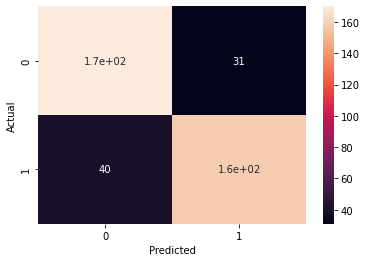

In [90]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

[Back to top](#back)

### C. Confusion Matrix Evaluation Metrics <a name="subparagraph33"></a>

In [91]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8225
Precision: 0.8368421052631579
Recall: 0.7989949748743719


[Back to top](#back)

### D. ROC Curve (Plotting an ROC curve) <a name="subparagraph34"></a>

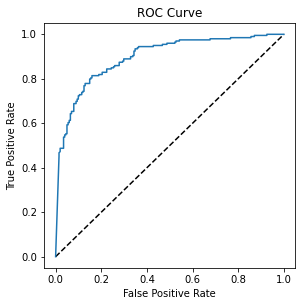

In [92]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.subplots(figsize=(4.5, 4.5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[Back to top](#back)

### E. AUC <a name="subparagraph35"></a>

In [93]:
# pass the True labels and the predicted probabilites to roc_auc_score
metrics.roc_auc_score(y_test, y_pred_prob)

0.8962099052476311

[Back to top](#back)

<a name="paragraph3"></a>
## 4. Measuring the Performance of a GaussianNB Machine Learning Model

### A. Model Evaluation using Confusion Matrix <a name="subparagraph41"></a>

In [94]:
# confusion_matrix
print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test, y_pred_gnb)}\n')

# classification report
print(f'Classification Report: \n{metrics.classification_report(y_test, y_pred_gnb)}')

Confusion Matrix:
[[123  78]
 [ 51 148]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       201
           1       0.65      0.74      0.70       199

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400



[Back to top](#back)

### B. Visualizing Confusion Matrix using Heatmap <a name="subparagraph42"></a>

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

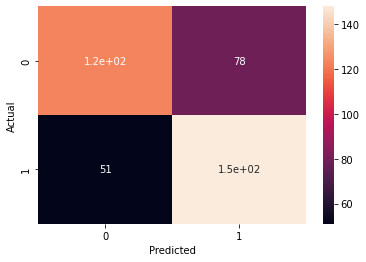

In [95]:
confusion_matrix = pd.crosstab(y_test, y_pred_gnb, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

[Back to top](#back)

### C. Confusion Matrix Evaluation Metrics <a name="subparagraph43"></a>

In [96]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gnb))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_gnb))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_gnb))

Accuracy: 0.6775
Precision: 0.6548672566371682
Recall: 0.7437185929648241


[Back to top](#back)

### D. ROC Curve (Plotting an ROC curve) <a name="subparagraph44"></a>

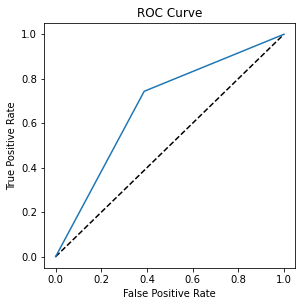

In [97]:
# Compute predicted probabilities: y_pred_prob
y_pred_gnb_prob = gnb.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_gnb_prob)

# Plot ROC curve
plt.subplots(figsize=(4.5, 4.5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[Back to top](#back)

### E.AUC <a name="subparagraph45"></a>

In [98]:
# pass the True labels and the predicted probabilites to roc_auc_score
metrics.roc_auc_score(y_test, y_pred_gnb_prob)

0.6778294457361435

[Back to top](#back)